<h1 style= "color:black; font-size:392%"> MENTAL HEALTH CARE <b style="color:blue">EDA</b> IN THE USA FOR A PERIOD OF 4 WEEKS </h1>
<h2 style="color:black">BACKGROUND</h2> 
<b> The dataset used for this exploratory data analysis was obtained from <a href="https://data.cdc.gov/NCHS/Mental-Health-Care-in-the-Last-4-Weeks/yni7-er2q">data.gov.cdc</a> </b> 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 40px;
              color:white;">
IMPORT RELEVANT LIBRARIES
</p>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, BayesianRidge
import warnings
warnings.filterwarnings("ignore")

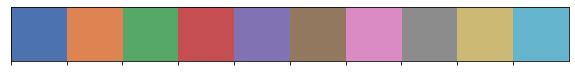

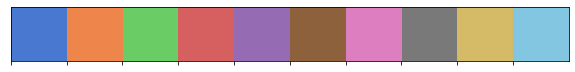

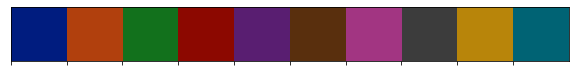

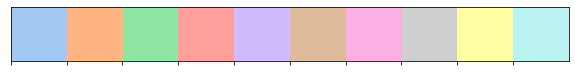

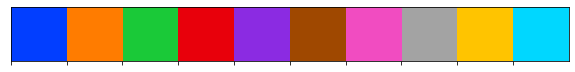

In [2]:
deep=sns.set_palette("deep")
muted=sns.set_palette("muted")
dark=sns.set_palette("dark")
pastel=sns.set_palette("pastel")
colorblind=sns.set_palette("colorblind")
bright=sns.set_palette("bright")

deep=sns.color_palette("deep")
muted=sns.color_palette("muted")
dark=sns.color_palette("dark")
pastel=sns.color_palette("pastel")
colorblind=sns.color_palette("colorblind")
bright=sns.color_palette("bright")
sns.palplot(deep)
sns.palplot(muted)
sns.palplot(dark)
sns.palplot(pastel)
sns.palplot(bright)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">
READ DATASET
</p>

<h1 style="color:blue"; font-size=Reading the csv file and getting the summary

In [3]:
HealthData=pd.read_csv("../input/mentalhealth/Mental_Health_Care_in_the_Last_4_Weeks.csv")
HealthData.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


 <h1 style="color:blue"; font-size:100%">INSPECT DATA:</h1> 

 <h1 style="color:blue; font-size:150%">Database Dimension and Size:</h1> 

In [4]:
# Database dimension
print("Database dimension is ", HealthData.shape)

# Database size
print("Database size is ", HealthData.size)

Database dimension is  (10404, 15)
Database size is  156060


 <h1 style="color:blue; font-size:150%">Database Column Type :</h1> 

<h1 style="color:tomato; font-size:

In [5]:
# Database column type
HealthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

 <h1 style="color:blue; font-size:150%">Checking for the Numerical Variables of the Dataframe and the summary:</h1> 


 


In [6]:
HealthData.describe()

,Time Period,Value,LowCI,HighCI,Suppression Flag
count,10404.000000,9914.000000,9914.000000,9914.000000,22.0
mean,28.134948,17.430190,14.757353,20.449818,1.0
std,11.040210,8.208126,7.627376,8.956888,0.0
min,1.000000,1.400000,0.800000,2.000000,1.0
25%,20.000000,10.300000,8.000000,12.900000,1.0
50%,29.000000,16.200000,13.900000,19.200000,1.0
75%,37.000000,24.000000,20.700000,27.400000,1.0
max,45.000000,56.400000,48.100000,66.100000,1.0


 <h1 style="color:red"; font-size:100%">DATA CLEANING AND MANIPULATION:</h1> 

 <h1 style="color:tomato"; font-size:100%">Calaculatin for Null Values:</h1> 

In [7]:
HealthData.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">
INSIGHT:Some of the columns have missing values
</p>
 
 


deep=sns.set_palette("deep")
muted=sns.set_palette("muted")
dark=sns.set_palette("dark")
pastel=sns.set_palette("pastel")
colorblind=sns.set_palette("colorblind")
bright=sns.set_palette("bright")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">
IMPORT "missingno" LIBRARY TO SHOW THE DISTRIBUTION OF MISSING VALUES IN THE DATAFRAME
</p>

<AxesSubplot:>

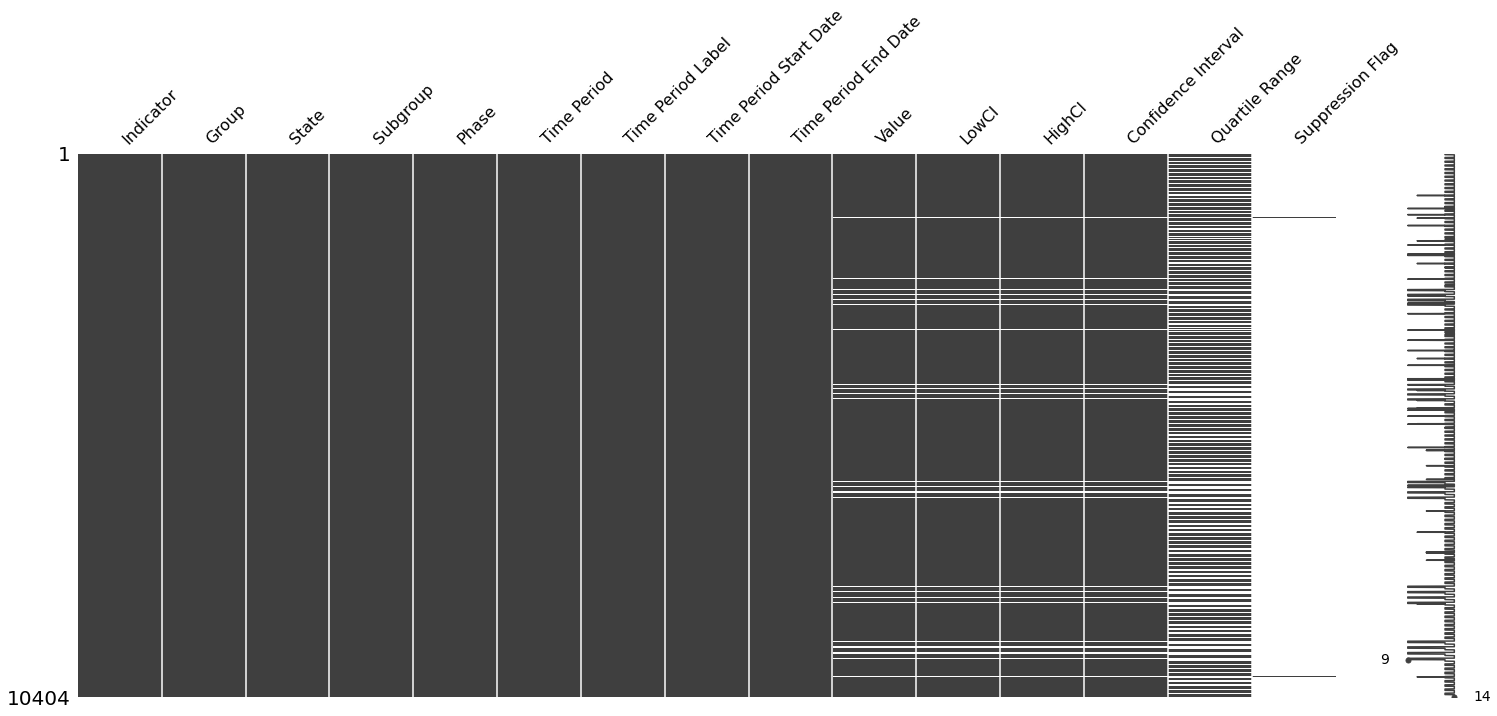

In [8]:
import missingno as mn
mn.matrix(HealthData)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: We have few values that are missing.
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Showing the % of missing values of each column , if the % is more than 30% 
# then drop such column.
</p>
</div>

In [9]:
null_percentage=round(HealthData.isnull().sum() / HealthData.shape[0] * 100,3)


In [10]:
null_percentage.head(15)

Indicator                  0.000
Group                      0.000
State                      0.000
Subgroup                   0.000
Phase                      0.000
Time Period                0.000
Time Period Label          0.000
Time Period Start Date     0.000
Time Period End Date       0.000
Value                      4.710
LowCI                      4.710
HighCI                     4.710
Confidence Interval        4.710
Quartile Range            35.294
Suppression Flag          99.789
dtype: float64

<h1 style="color:blue; font-size:200%">In order to plot a chart that will show us the distributions properly, we need to use the "reset_index()" function in order to create a well defined dataframe that can bear the x and y axis</h1>

In [11]:
null_percentage=pd.DataFrame(null_percentage.reset_index())
null_percentage.columns=["column name", "percentage"]


In [12]:
data_percentage=null_percentage["percentage"]
keys=null_percentage["column name"]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;"> PLOTTING BOTH PIE CHART AND POINT PLOT GRAPH TO SHOW THE DISTRIBUSTIONS   
</p>
</div>

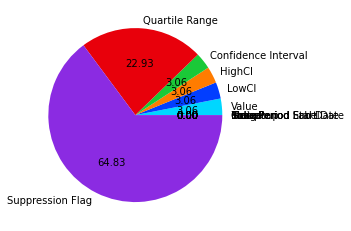

In [13]:
#define seaborn palatte to use
palette_color = sns.color_palette('bright')
# plotting data on pie chart

plt.pie(data_percentage, labels=keys, colors=palette_color, autopct="%.2f")
plt.show()


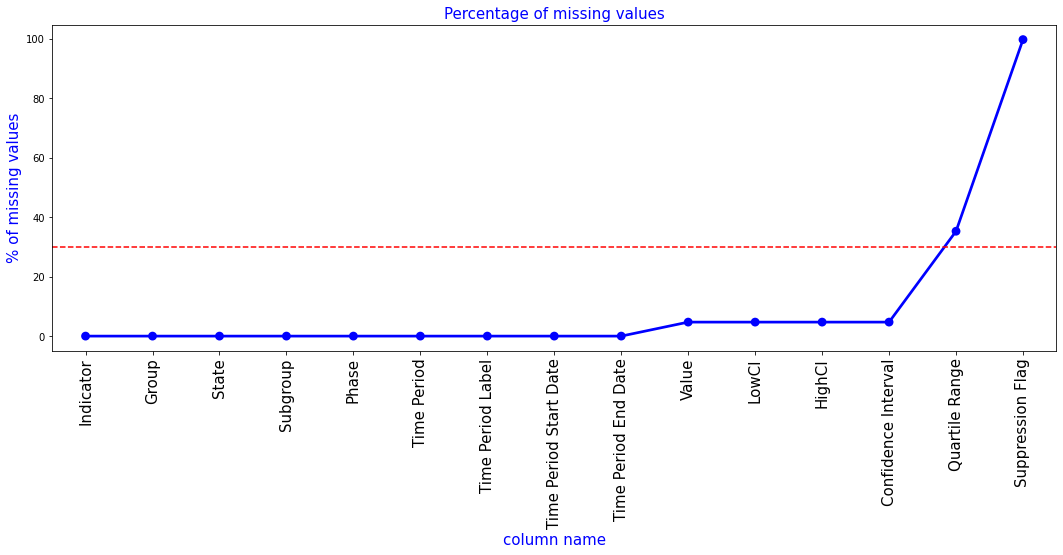

In [14]:
#Plotting data on a point plot

fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x="column name", y="percentage", data=null_percentage, color="blue")


# Adding an hline of 30(%) to show data are above the line so thet we can drop them

ax.axhline(30, ls="--", color="red")

# adding plot titles and manuplating the x axis orientation

plt.title("Percentage of missing values", fontsize=15, color="blue")
plt.xlabel("column name", fontsize=15, color="blue")
plt.ylabel("% of missing values", fontsize=15, color="blue")
plt.xticks(rotation=90, fontsize=15)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">Insight: The columns "Suppression Flag" and "Quartile Range" make up about 87% of the missing values in the pie chart and are above 30% above the hline in the plot point graph. Therefore, we will be dropping both columns in the next cell
​
<p style="padding: 10px;
              color:white;">    
</p>
</div>


In [15]:
# Dropping columns
data=HealthData.drop(["Suppression Flag","Quartile Range"], axis="columns")
data


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,Needed Counseling or Therapy But Did Not Get I...,By State,Virginia,Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,10.1,7.1,13.8,7.1 - 13.8
10400,Needed Counseling or Therapy But Did Not Get I...,By State,Washington,Washington,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,14.8,12.5,17.4,12.5 - 17.4
10401,Needed Counseling or Therapy But Did Not Get I...,By State,West Virginia,West Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,9.8,6.6,13.8,6.6 - 13.8
10402,Needed Counseling or Therapy But Did Not Get I...,By State,Wisconsin,Wisconsin,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,11.6,8.5,15.3,8.5 - 15.3


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;"> SHOWING THE NEW DATAFRAME WITH THE DELETED COLUMNS
</p>
</div>

In [16]:
# original dataframe
HealthData.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

In [17]:
# new dataframe with deleted columns
data.isnull().sum()

Indicator                   0
Group                       0
State                       0
Subgroup                    0
Phase                       0
Time Period                 0
Time Period Label           0
Time Period Start Date      0
Time Period End Date        0
Value                     490
LowCI                     490
HighCI                    490
Confidence Interval       490
dtype: int64

In [18]:
# filling missing values in the remaining columns
data.fillna(0, inplace=True)
data.isnull().sum()

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
LowCI                     0
HighCI                    0
Confidence Interval       0
dtype: int64

In [19]:
# check for duplicated rows
data.duplicated().sum()


0

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">COMMENT: At this point, we can say that our data is cleaned, with no dupplicates.

<p style="padding: 10px;
              color:white;">    
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:BLACK;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">FURTHER EXPLORATION INTO THE DATA

<p style="padding: 10px;
              color:white;">    
</p>
</div>

In [20]:
data

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,Needed Counseling or Therapy But Did Not Get I...,By State,Virginia,Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,10.1,7.1,13.8,7.1 - 13.8
10400,Needed Counseling or Therapy But Did Not Get I...,By State,Washington,Washington,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,14.8,12.5,17.4,12.5 - 17.4
10401,Needed Counseling or Therapy But Did Not Get I...,By State,West Virginia,West Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,9.8,6.6,13.8,6.6 - 13.8
10402,Needed Counseling or Therapy But Did Not Get I...,By State,Wisconsin,Wisconsin,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,11.6,8.5,15.3,8.5 - 15.3


In [21]:
# check for the key indicators used for the data collection
Indicators=data["Indicator"]
Indicators

0        Took Prescription Medication for Mental Health...
1        Took Prescription Medication for Mental Health...
2        Took Prescription Medication for Mental Health...
3        Took Prescription Medication for Mental Health...
4        Took Prescription Medication for Mental Health...
                               ...                        
10399    Needed Counseling or Therapy But Did Not Get I...
10400    Needed Counseling or Therapy But Did Not Get I...
10401    Needed Counseling or Therapy But Did Not Get I...
10402    Needed Counseling or Therapy But Did Not Get I...
10403    Needed Counseling or Therapy But Did Not Get I...
Name: Indicator, Length: 10404, dtype: object

In [22]:
# check for the number of specific indicators
Indicators.nunique()

4

In [23]:
# There are 4 specific indicators. let us print them out
print("These are the indicators listed here: ",
       Indicators.unique())

These are the indicators listed here:  ['Took Prescription Medication for Mental Health, Last 4 Weeks'
 'Received Counseling or Therapy, Last 4 Weeks'
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'
 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']


In [24]:
# The same process will be applied to the Group column
Groups=data["Group"]
print('There are ', Groups.nunique(), " unique groups in the data ", 
     "and they include; ", Groups.unique())

There are  10  unique groups in the data  and they include;  ['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State'
 'By Disability status' 'By Sexual orientation' 'By Gender identity']


In [25]:
# We will repeat the same process we did above on the column State  
States=data["State"] 
print('There are ', States.nunique(), " unique states in the data ", 
     "and they include; ", States.unique())



There are  52  unique states in the data  and they include;  ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:BLACK;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">The United State, which is a country is in the State column, so we may decide to filter it out to avoid ambiquity

<p style="padding: 10px;
              color:white;">    
</p>
</div>

In [26]:
States

0        United States
1        United States
2        United States
3        United States
4        United States
             ...      
10399         Virginia
10400       Washington
10401    West Virginia
10402        Wisconsin
10403          Wyoming
Name: State, Length: 10404, dtype: object

In [27]:
dat=data[data["State"]=="United States"]
dat

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,High school diploma or GED,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,9.1,7.7,10.5,7.7 - 10.5
10349,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,Some college/Associate's degree,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,15.1,14.0,16.2,14.0 - 16.2
10350,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,Bachelor's degree or higher,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,10.4,9.8,11.0,9.8 - 11.0
10351,Needed Counseling or Therapy But Did Not Get I...,By Disability status,United States,With disability,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,25.3,23.3,27.4,23.3 - 27.4


In [28]:
data.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval'],
      dtype='object')

In [29]:
Indicators = pd.DataFrame(data.groupby("Indicator")["Value"].sum())
Groups=pd.DataFrame(data.groupby("Group")["Value"].sum())
States=pd.DataFrame(data.groupby("State")["Value"].sum())
Subgroups=pd.DataFrame(data.groupby("Subgroup")["Value"].sum())



In [30]:
Indicators=pd.DataFrame(Indicators.reset_index())
Indicators.columns=("Indicator", "Value")
Groups=pd.DataFrame(Groups.reset_index())
Groups.columns=("Group", "Value")
States=pd.DataFrame(States.reset_index())
States.columns=("State", "Value")
Subgroups=pd.DataFrame(Subgroups.reset_index())
Subgroups.columns=("Subgroup", "Value")



In [31]:
Indicators["Indicator"]

0    Needed Counseling or Therapy But Did Not Get I...
1         Received Counseling or Therapy, Last 4 Weeks
2    Took Prescription Medication for Mental Health...
3    Took Prescription Medication for Mental Health...
Name: Indicator, dtype: object

In [32]:
States=States.drop(44)
States

,State,Value
0,Alabama,2383.9
1,Alaska,2055.4
2,Arizona,2105.5
3,Arkansas,2469.8
4,California,1999.2
5,Colorado,2413.6
6,Connecticut,2293.8
7,Delaware,2179.2
8,District of Columbia,2619.7
9,Florida,1996.2


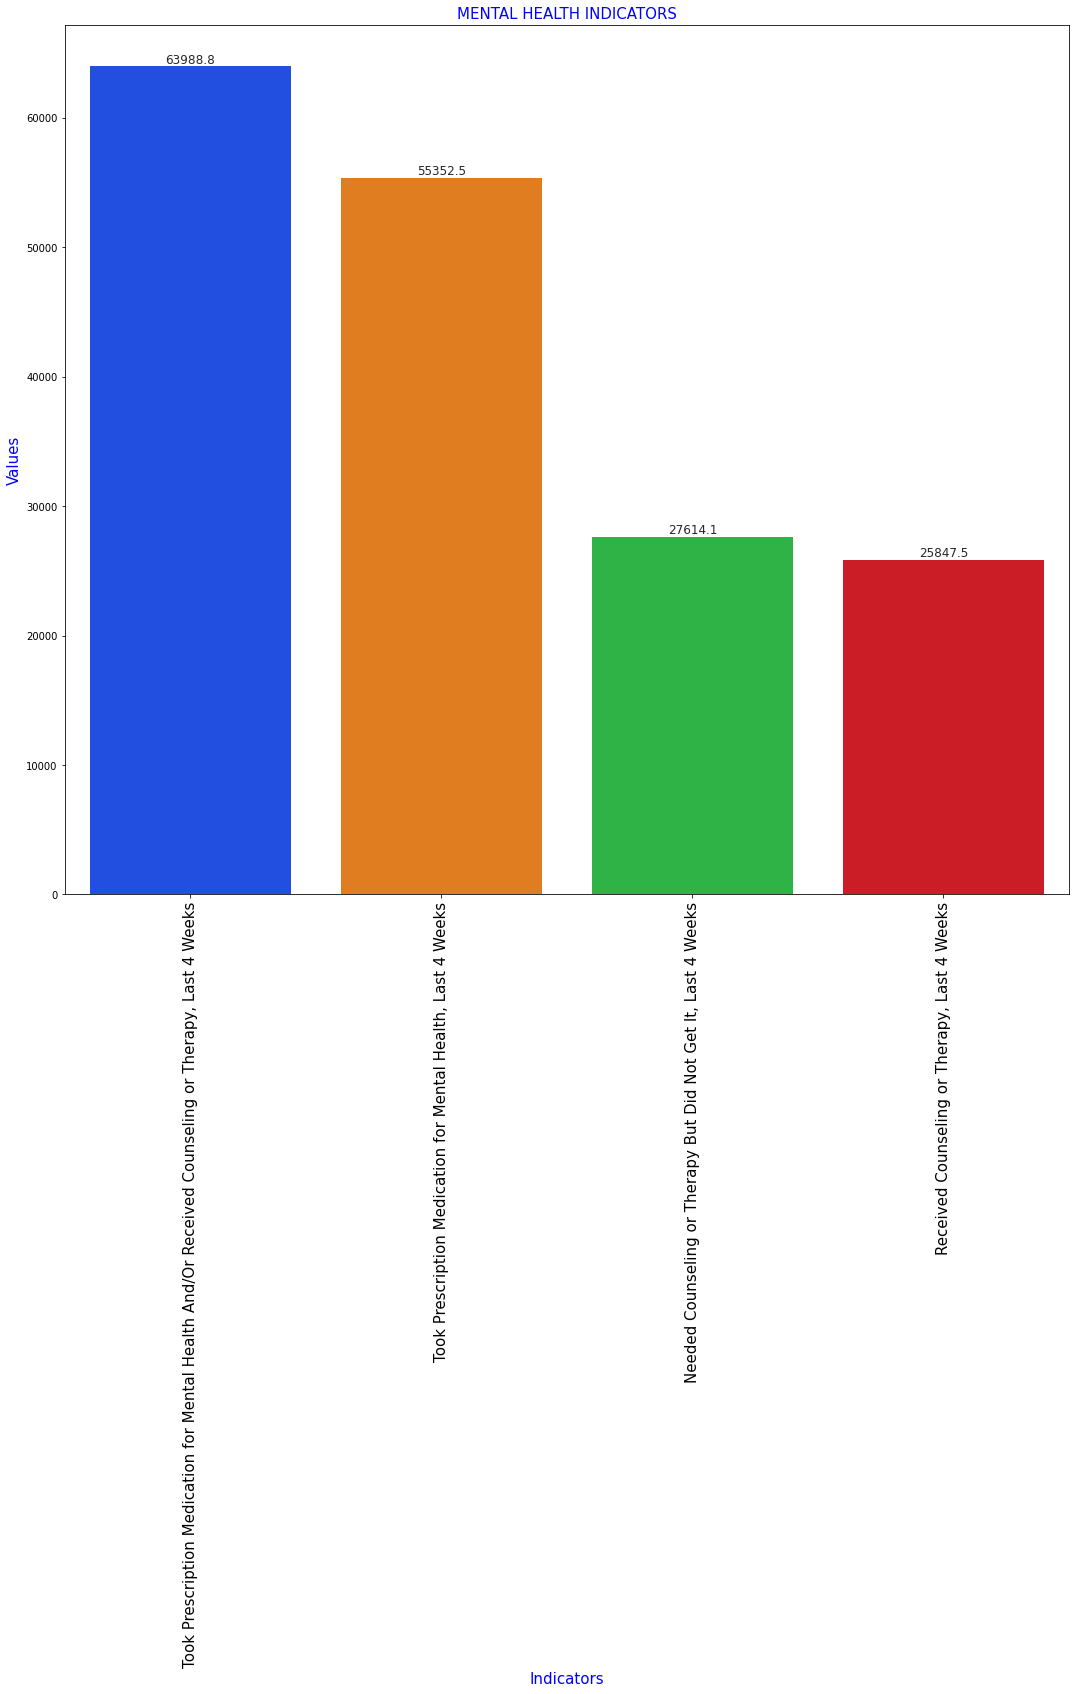

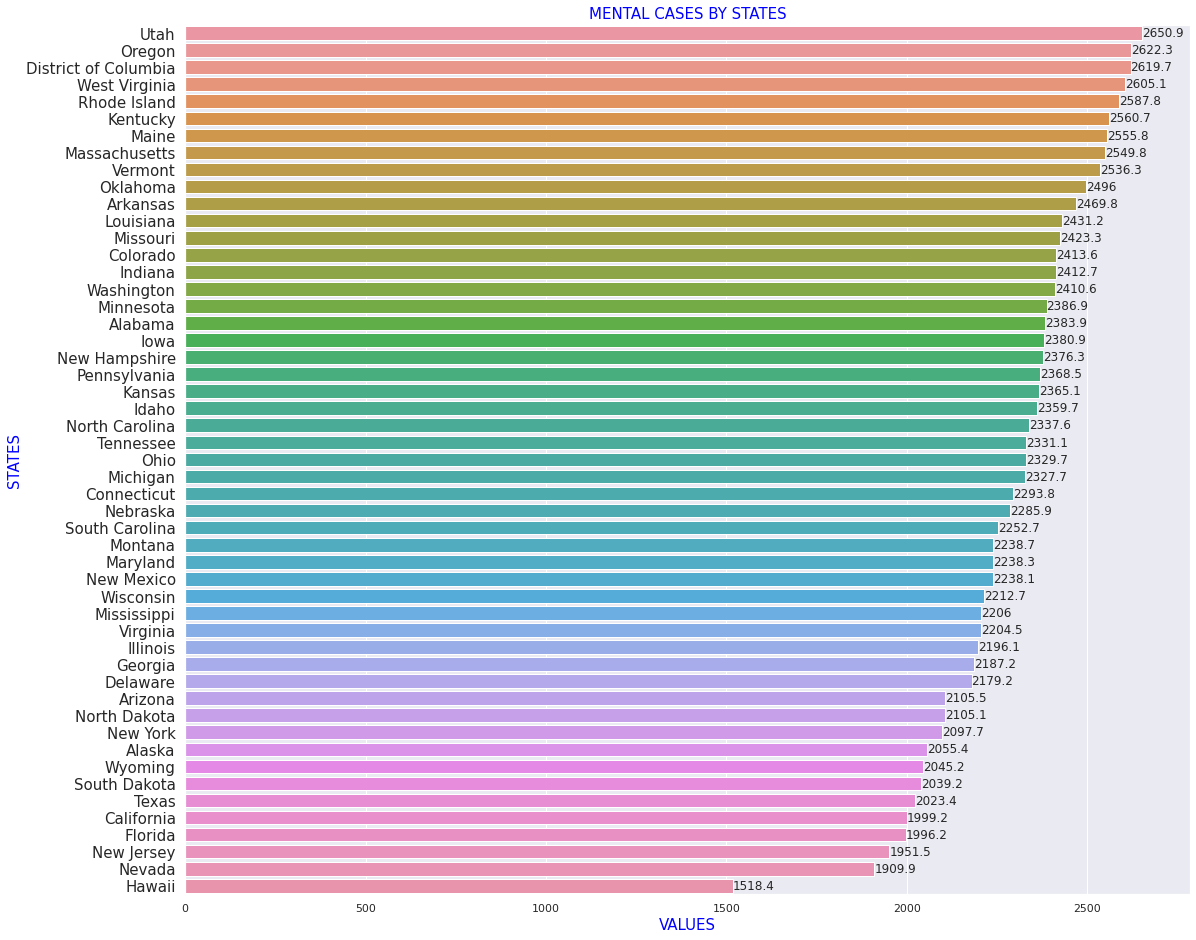

In [33]:
fig=plt.figure(figsize=(18,16))
ax=sns.barplot(x="Indicator", y="Value", data=Indicators, order=Indicators.sort_values('Value', ascending=False).Indicator)
sns.set_theme(style="darkgrid")
plt.title("MENTAL HEALTH INDICATORS", fontsize=15, color="blue")
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("Indicators", fontsize=15, color="blue")
plt.ylabel("Values", fontsize=15, color="blue")
for i in ax.containers:
    ax.bar_label(i,)

fig3=plt.figure(figsize=(18,16))
x="Value"
ax=sns.barplot(x="Value", y="State", data=States, order=States.sort_values('Value', ascending=False).State)
sns.set_theme(style="darkgrid")
plt.yticks(fontsize=15)
plt.title("MENTAL CASES BY STATES", fontsize=15, color="blue")
plt.xlabel("VALUES", fontsize=15, color="blue")
plt.ylabel("STATES", fontsize=15, color="blue")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()





According to the indicators, some people needed counseling or therapy but did not get one. So we will calculate the percentage of such population

In [34]:
TotalSumIndicators=Indicators["Value"].sum()
TotalSumIndicators

172802.9

In [35]:
# we can see that TotalSumIndicators=116872.9
TotalSumIndicators=116872.9
TotalSumIndicators

116872.9

Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks(NC)

In [36]:
SumofNC=Indicators[Indicators["Indicator"]=="Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks"]
SumofNC=SumofNC.sum()
SumofNC=18023.8



In [37]:
#we can see that SumofNC=18023.8
SumofNC=18023.8
SumofNC

18023.8

% of those that  Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks vs Others(opposite)

In [38]:

percentageNC=(SumofNC/TotalSumIndicators)*100
percentageNC=round(percentageNC)
percentageNC=print(percentageNC,"%")
percentageNC

15 %


If the *% of those that needed counseling or therapy but did not get any* was (15%), the % of other 3 indicators combined will be (85%):
        *'Took Prescription Medication for Mental Health, Last 4 Weeks'*,
       *'Received Counseling or Therapy, Last 4 Weeks'*,
       *'Took Prescription Medication for Mental Health And/Or Received Counseling or 
          Therapy, Last 4 Weeks',*

In [39]:
Others=85
percentageNC=15
fra=pd.DataFrame([Others],[percentageNC])
fra=fra.reset_index()
fra.columns=("percentagNC","others")
fra

,percentagNC,others
0,15,85


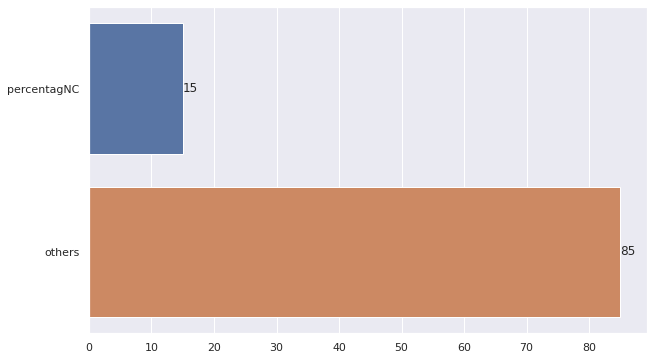

In [40]:

bar,ax = plt.subplots(figsize=(10,6))

ax = sns.barplot( data=fra,orient='h' )
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [41]:
a=data.loc[data["Indicator"]=="Took Prescription Medication for Mental Health, Last 4 Weeks"].isin(data["Value"])
data.where(a, inplace=True)
a["Indicator"].unique()

array([False])

In [42]:
d=pd.Series(b.groupby).sum()
d

NameError: name 'b' is not defined

In [ ]:
b=data["Time Period"]
b